# Time Series Clustering for Cancer Incidince

## Loading the libraries

In [1]:
# loading the libraries for time-series clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading the data

In [2]:
## loading Csv files
mortality1 = pd.read_csv("datasets/morticd10_part1/Morticd10_part1")
mortality2 = pd.read_csv("datasets/morticd10_part2/Morticd10_part2")
mortality3 = pd.read_csv("datasets/morticd10_part3/Morticd10_part3")
mortality4 = pd.read_csv("datasets/morticd10_part4/Morticd10_part4")
mortality5 = pd.read_csv("datasets/morticd10_part5/Morticd10_part5")

C:\Users\hajam\AppData\Local\Temp\ipykernel_30548\3666072874.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  mortality1 = pd.read_csv("datasets/morticd10_part1/Morticd10_part1")
C:\Users\hajam\AppData\Local\Temp\ipykernel_30548\3666072874.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  mortality2 = pd.read_csv("datasets/morticd10_part2/Morticd10_part2")
C:\Users\hajam\AppData\Local\Temp\ipykernel_30548\3666072874.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mortality3 = pd.read_csv("datasets/morticd10_part3/Morticd10_part3")
C:\Users\hajam\AppData\Local\Temp\ipykernel_30548\3666072874.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mortality4 = pd.read_csv("datasets/morticd10_part4/Morticd10_part4")
C:\Users\hajam\AppData\Local\Temp\ipykernel_3054

In [3]:
## Appending the dataframes to each
mortality = mortality1.append(mortality2)
mortality = mortality.append(mortality3)
mortality = mortality.append(mortality4)
mortality = mortality.append(mortality5)

C:\Users\hajam\AppData\Local\Temp\ipykernel_30548\1819226427.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mortality = mortality1.append(mortality2)
C:\Users\hajam\AppData\Local\Temp\ipykernel_30548\1819226427.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mortality = mortality.append(mortality3)
C:\Users\hajam\AppData\Local\Temp\ipykernel_30548\1819226427.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mortality = mortality.append(mortality4)
C:\Users\hajam\AppData\Local\Temp\ipykernel_30548\1819226427.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mortality = mortality.append(mortality5)


In [4]:
mortality.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [5]:
# filtering columns and including when List = 162 or 163    
mortality = mortality[(mortality['Cause'] == "C33") | (mortality['Cause'] == "C34")]

## Aggregating the columns (Death1, Death2, ...) into total column totaldeath

In [6]:
mortality.columns

Index(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex', 'Frmat',
       'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5',
       'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11',
       'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17',
       'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23',
       'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Deaths4'],
      dtype='object')

In [7]:
# subsetting ("Country', 'Year', 'Sex', 'Frmat','IM_Frmat', 'Deaths1') from the dataframe
mortality = mortality[['Country', 'Year', 'Sex', 'Frmat','IM_Frmat', 'Deaths1']]

## plotting the time series for death1 each year for sex 1 in country 1125

In [14]:
## Turning the Year variable into date
mortality['Year'] = pd.to_datetime(mortality['Year'], format='%Y')

<AxesSubplot:xlabel='Year'>

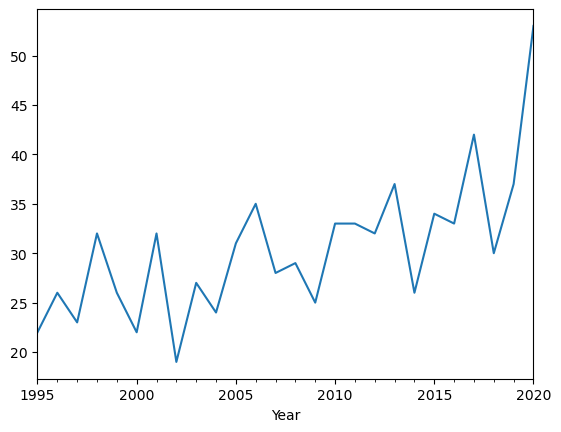

In [22]:
# plotting a time-seres of Death1
mortality[mortality["Country"] == 3160].groupby('Year')['Deaths1'].sum().plot()


In [16]:
## aggregating Death1 by year and country
mortality = mortality.groupby(['Year', 'Country'])['Deaths1'].sum().reset_index()